In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_dfr = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/oecd_fertility_rates.csv')
df_gii = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/HDR_gii.csv')
df_gdp = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/oecd_gdp.csv')
df_ii = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/oecd_income_inequality.csv')
df_wer = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/oecd_women_employment_rate.csv')
df_wip = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/oecd_women_in_politics.csv')

# Intro

## oecd_fertility_rates

In [7]:
df_dfr = df_dfr[['TIME', 'LOCATION', 'Value']]
df_dfr = df_dfr.rename(columns={'Value': 'Fertility Rates'})
df_dfr.head()

,TIME,LOCATION,Fertility Rates
0,1970,DEU,2.03
1,1971,DEU,1.97
2,1972,DEU,1.74
3,1973,DEU,1.56
4,1974,DEU,1.53


In [8]:
df_dfr.columns

Index(['TIME', 'LOCATION', 'Fertility Rates'], dtype='object')

In [9]:
df_dfr.LOCATION.unique()

array(['DEU', 'ITA', 'KOR'], dtype=object)

In [10]:
locations = ['ITA', 'DEU', 'KOR']
dfs = {}

for loc in locations:
    dfs[loc] = df_dfr[df_dfr['LOCATION'] == loc]

df_dfr_ita = dfs['ITA']
df_dfr_deu = dfs['DEU']
df_dfr_kor = dfs['KOR'].iloc[:51]

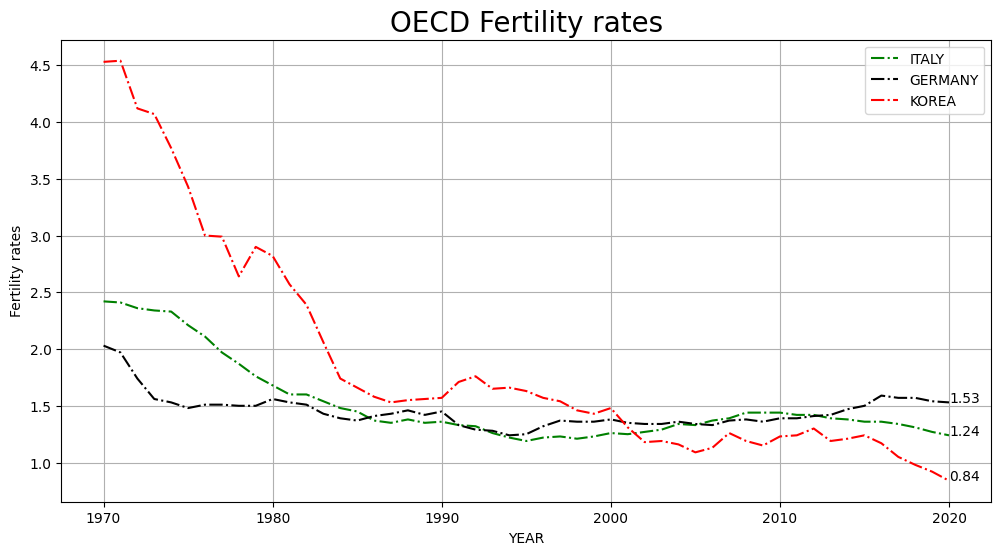

<Figure size 600x1200 with 0 Axes>

<Figure size 600x1200 with 0 Axes>

In [11]:
x1 = df_dfr_ita['TIME'].to_xarray()
x2 = df_dfr_deu['TIME'].to_xarray()
x3 = df_dfr_kor['TIME'].to_xarray()

y1=df_dfr_ita['Fertility Rates'].to_xarray()
y2=df_dfr_deu['Fertility Rates'].to_xarray()
y3=df_dfr_kor['Fertility Rates'].to_xarray()

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 그래프 그리기
plt.plot(x1, y1, color='g', ls='dashdot', label='ITALY')
plt.plot(x2, y2, color='k', ls='dashdot', label='GERMANY')
plt.plot(x3, y3, color='r', ls='dashdot', label='KOREA')

# 그래프 타이틀, 축 레이블, 범례 추가
plt.title('OECD Fertility rates', fontsize=20)
plt.xlabel('YEAR')
plt.ylabel('Fertility rates')
plt.legend()

# 마지막 값 표시하기
plt.text(x1[-1], y1[-1], f'{y1[-1]:.2f}')
plt.text(x2[-1], y2[-1], f'{y2[-1]:.2f}')
plt.text(x3[-1], y3[-1], f'{y3[-1]:.2f}')

# 그래프 보여주기
plt.grid()
plt.show()
plt.figure(figsize=(6, 12))

# Body

## Korea

### Correlation

In [12]:
df_pef = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/private_education_fee.csv')
df_wafm = pd.read_csv("/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/women's average age at first marriage .csv")
df_kor_gdp = pd.read_csv("/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/korean_gdp.csv")
df_kor_cpi = pd.read_csv("/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/korea_cpi.csv")

In [13]:
file = [df_gii, df_gdp, df_ii, df_wer, df_wip, df_pef, df_wafm]

for i in file:
    print(i.iloc[:,:4].head())

  iso3               country    hdicode region
0  AFG           Afghanistan        Low     SA
1  AGO                Angola     Medium    SSA
2  ALB               Albania       High    ECA
3  AND               Andorra  Very High    NaN
4  ARE  United Arab Emirates  Very High     AS
  LOCATION INDICATOR SUBJECT  MEASURE
0      AUS       GDP     TOT  USD_CAP
1      AUS       GDP     TOT  USD_CAP
2      AUS       GDP     TOT  USD_CAP
3      AUS       GDP     TOT  USD_CAP
4      AUS       GDP     TOT  USD_CAP
  LOCATION   INDICATOR SUBJECT MEASURE
0      AUS  INCOMEINEQ    GINI    INEQ
1      AUS  INCOMEINEQ    GINI    INEQ
2      AUS  INCOMEINEQ    GINI    INEQ
3      AUS  INCOMEINEQ    GINI    INEQ
4      AUS  INCOMEINEQ    GINI    INEQ
  LOCATION INDICATOR SUBJECT    MEASURE
0      AUS       EMP   WOMEN  PC_WKGPOP
1      AUS       EMP   WOMEN  PC_WKGPOP
2      AUS       EMP   WOMEN  PC_WKGPOP
3      AUS       EMP   WOMEN  PC_WKGPOP
4      AUS       EMP   WOMEN  PC_WKGPOP
  LOCATION      

In [14]:
df_gii_kor = df_gii[df_gii['country']=='Korea (Republic of)'].T
df_gii_kor=df_gii_kor.reset_index()
df_gii_kor.columns = ['TIME', 'Gender Inequality Index']
df_gii_kor = df_gii_kor[df_gii_kor['TIME'].str.startswith('gii')]
df_gii_kor['TIME'] = df_gii_kor['TIME'].str.extract(r'_([\d]+)').astype(int)
df_gii_kor = df_gii_kor.iloc[1:]
df_gii_kor.reset_index(drop=True, inplace=True)

# TIME 컬럼과 Gender Inequality Index컬럼을 숫자형으로 변환
df_gii_kor['TIME'] = pd.to_numeric(df_gii_kor['TIME'])
df_gii_kor['Gender Inequality Index'] = df_gii_kor['Gender Inequality Index'].astype(float)
df_gii_kor.head()

,TIME,Gender Inequality Index
0,1990,0.298
1,1991,0.290
2,1992,0.280
3,1993,0.265
4,1994,0.256


In [15]:
df_pef = df_pef.replace(' ', '', regex=True)
df_pef = df_pef.T.reset_index()
df_pef.columns = df_pef.iloc[0]
# df_pef = df_pef[1:]
df_pef_mean = df_pef[df_pef['과목및유형'].str.startswith('평균')]
df_pef_mean = df_pef_mean[['과목 및 유형', '사교육비']]
df_pef_mean.columns = ['TIME', 'Private Education Expense']
df_pef_mean['TIME'] = pd.to_numeric(df_pef_mean['TIME'])
df_pef_mean['Private Education Expense'] = df_pef_mean['Private Education Expense'].astype(float)
df_pef_mean['Private Education Expense'] = df_pef_mean['Private Education Expense']*10000
df_pef_mean


,TIME,Private Education Expense
1,2007,222000.0
6,2008,233000.0
11,2009,242000.0
16,2010,240000.0
21,2011,240000.0
26,2012,236000.0
31,2013,239000.0
36,2014,242000.0
41,2015,244000.0
46,2016,256000.0


In [17]:
df_gdp_kor = df_kor_gdp.iloc[1].reset_index().iloc[1:]
df_gdp_kor.columns = ['TIME', 'GDP']
df_gdp_kor['TIME'] = pd.to_numeric(df_gdp_kor['TIME'])
df_gdp_kor['GDP'] = df_gdp_kor['GDP'].astype(float)

df_ii_kor = df_ii[df_ii['LOCATION']=='KOR']
df_ii_kor = df_ii_kor[['TIME', 'Value']]
df_ii_kor.columns = ['TIME', 'Income Inequality']
# df_ii_kor['TIME'] = pd.to_numeric(df_ii_kor['TIME'])
# df_ii_kor['Income_Inequality'] = df_ii_kor['Income Inequality'].astype(float)

df_wer_kor = df_wer[df_wer['LOCATION']=='KOR']
df_wer_kor = df_wer_kor[['TIME', 'Value']]
df_wer_kor.columns = ['TIME', 'Women Employment Rate']
df_wer_kor['TIME'] = pd.to_numeric(df_wer_kor['TIME'])
df_wer_kor['Women Employment Rate'] = df_wer_kor['Women Employment Rate'].astype(float)

df_wip_kor = df_wip[df_wip['LOCATION']=='KOR']
df_wip_kor = df_wip_kor[['TIME', 'Value']]
df_wip_kor.columns = ['TIME', 'Women In Politics']
df_wip_kor['TIME'] = pd.to_numeric(df_wip_kor['TIME'])
df_wip_kor['Women In Politics'] = df_wip_kor['Women In Politics'].astype(float)

df_kor_cpi.columns = ['TIME', 'Consumer Price Index']

In [18]:
df_kor_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TIME                  56 non-null     int64  
 1   Consumer Price Index  56 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [19]:
df_wafm = pd.read_csv("/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/women's average age at first marriage .csv")
df_wafm = df_wafm.T.reset_index()
df_wafm = df_wafm[['index',1]]
df_wafm.columns = ['TIME', "Women's Average Age at First Marriage"]
df_wafm = df_wafm.iloc[1:]
df_wafm['TIME'] = pd.to_numeric(df_wafm['TIME'])
df_wafm["Women's Average Age at First Marriage"] = df_wafm["Women's Average Age at First Marriage"].astype(float)
df_wafm.head()

,TIME,Women's Average Age at First Marriage
1,1990,24.78
2,1991,24.84
3,1992,24.93
4,1993,25.01
5,1994,25.14


In [20]:
df_kor = pd.merge(df_gii_kor, df_gdp_kor, on='TIME', how='outer')
df_kor = pd.merge(df_kor, df_ii_kor, on='TIME', how='outer')
df_kor = pd.merge(df_kor, df_wer_kor, on='TIME', how='outer')
df_kor = pd.merge(df_kor, df_pef_mean, on='TIME', how='outer')
df_kor = pd.merge(df_kor, df_wafm, on='TIME', how='outer')
df_kor = pd.merge(df_kor, df_kor_cpi, on='TIME', how='outer')

df_dfr_kor = df_dfr_kor[['TIME', 'Fertility Rates']]
df_kor = pd.merge(df_kor, df_dfr_kor, on='TIME', how='outer')

# TIME을 기준으로 정렬
df_kor = df_kor.sort_values('TIME')
df_kor.reset_index(inplace=True, drop=True)
df_kor.head(15)

,TIME,Gender Inequality Index,GDP,Income Inequality,Women Employment Rate,Private Education Expense,Women's Average Age at First Marriage,Consumer Price Index,Fertility Rates
0,1965,NaN,NaN,NaN,NaN,NaN,NaN,2.611,NaN
1,1966,NaN,NaN,NaN,NaN,NaN,NaN,2.905,NaN
2,1967,NaN,NaN,NaN,NaN,NaN,NaN,3.221,NaN
3,1968,NaN,NaN,NaN,NaN,NaN,NaN,3.568,NaN
4,1969,NaN,NaN,NaN,NaN,NaN,NaN,4.010,NaN
5,1970,NaN,81.6,NaN,NaN,NaN,NaN,4.650,4.53
6,1971,NaN,95.4,NaN,NaN,NaN,NaN,5.278,4.54
7,1972,NaN,108.6,NaN,NaN,NaN,NaN,5.895,4.12
8,1973,NaN,138.8,NaN,NaN,NaN,NaN,6.085,4.07
9,1974,NaN,195.4,NaN,NaN,NaN,NaN,7.564,3.77


In [21]:
df_kor_11_20 = df_kor.set_index('TIME')
df_kor_11_20 = df_kor_11_20.loc[2011:2020]
df_kor_11_20

,Gender Inequality Index,GDP,Income Inequality,Women Employment Rate,Private Education Expense,Women's Average Age at First Marriage,Consumer Price Index,Fertility Rates
TIME,,,,,,,,
2011,0.113,12534.3,0.388,53.14200,240000.0,29.14,89.850,1.24
2012,0.108,12779.6,0.385,53.54788,236000.0,29.41,91.815,1.30
2013,0.108,13705.6,0.372,53.98439,239000.0,29.59,93.010,1.19
2014,0.100,14839.5,0.363,55.01185,242000.0,29.81,94.196,1.21
2015,0.096,14653.4,0.352,55.73558,244000.0,29.96,94.861,1.24
2016,0.086,15000.3,0.355,56.13441,256000.0,30.11,95.783,1.17
2017,0.080,16233.1,0.354,56.85481,272000.0,30.24,97.645,1.05
2018,0.078,17251.6,0.345,57.15882,291000.0,30.40,99.086,0.98
2019,0.078,16510.1,0.339,57.78054,321000.0,30.59,99.466,0.92


In [22]:
df_kor.corr()

,TIME,Gender Inequality Index,GDP,Income Inequality,Women Employment Rate,Private Education Expense,Women's Average Age at First Marriage,Consumer Price Index,Fertility Rates
TIME,1.000000,-0.937626,0.960989,-0.972097,0.953798,0.855110,0.997590,0.994627,-0.859664
Gender Inequality Index,-0.937626,1.000000,-0.885791,0.937427,-0.879757,-0.873351,-0.936607,-0.947979,0.930980
GDP,0.960989,-0.885791,1.000000,-0.920327,0.956109,0.728297,0.974915,0.957525,-0.700920
Income Inequality,-0.972097,0.937427,-0.920327,1.000000,-0.929778,-0.829744,-0.980997,-0.960058,0.853847
Women Employment Rate,0.953798,-0.879757,0.956109,-0.929778,1.000000,0.817093,0.935355,0.905799,-0.724765
Private Education Expense,0.855110,-0.873351,0.728297,-0.829744,0.817093,1.000000,0.831514,0.772788,-0.936859
Women's Average Age at First Marriage,0.997590,-0.936607,0.974915,-0.980997,0.935355,0.831514,1.000000,0.993700,-0.886226
Consumer Price Index,0.994627,-0.947979,0.957525,-0.960058,0.905799,0.772788,0.993700,1.000000,-0.840696
Fertility Rates,-0.859664,0.930980,-0.700920,0.853847,-0.724765,-0.936859,-0.886226,-0.840696,1.000000


In [23]:
df_kor_11_20.corr()

,Gender Inequality Index,GDP,Income Inequality,Women Employment Rate,Private Education Expense,Women's Average Age at First Marriage,Consumer Price Index,Fertility Rates
Gender Inequality Index,1.000000,-0.942051,0.937427,-0.945228,-0.874662,-0.976860,-0.976955,0.895582
GDP,-0.942051,1.000000,-0.920327,0.960289,0.839857,0.940154,0.969602,-0.854200
Income Inequality,0.937427,-0.920327,1.000000,-0.929778,-0.829744,-0.980997,-0.960058,0.853847
Women Employment Rate,-0.945228,0.960289,-0.929778,1.000000,0.857084,0.946541,0.960082,-0.810015
Private Education Expense,-0.874662,0.839857,-0.829744,0.857084,1.000000,0.882431,0.895565,-0.949994
Women's Average Age at First Marriage,-0.976860,0.940154,-0.980997,0.946541,0.882431,1.000000,0.990536,-0.899917
Consumer Price Index,-0.976955,0.969602,-0.960058,0.960082,0.895565,0.990536,1.000000,-0.906566
Fertility Rates,0.895582,-0.854200,0.853847,-0.810015,-0.949994,-0.899917,-0.906566,1.000000


In [24]:
df_kor.columns

Index(['TIME', 'Gender Inequality Index', 'GDP', 'Income Inequality',
       'Women Employment Rate', 'Private Education Expense',
       'Women's Average Age at First Marriage', 'Consumer Price Index',
       'Fertility Rates'],
      dtype='object')

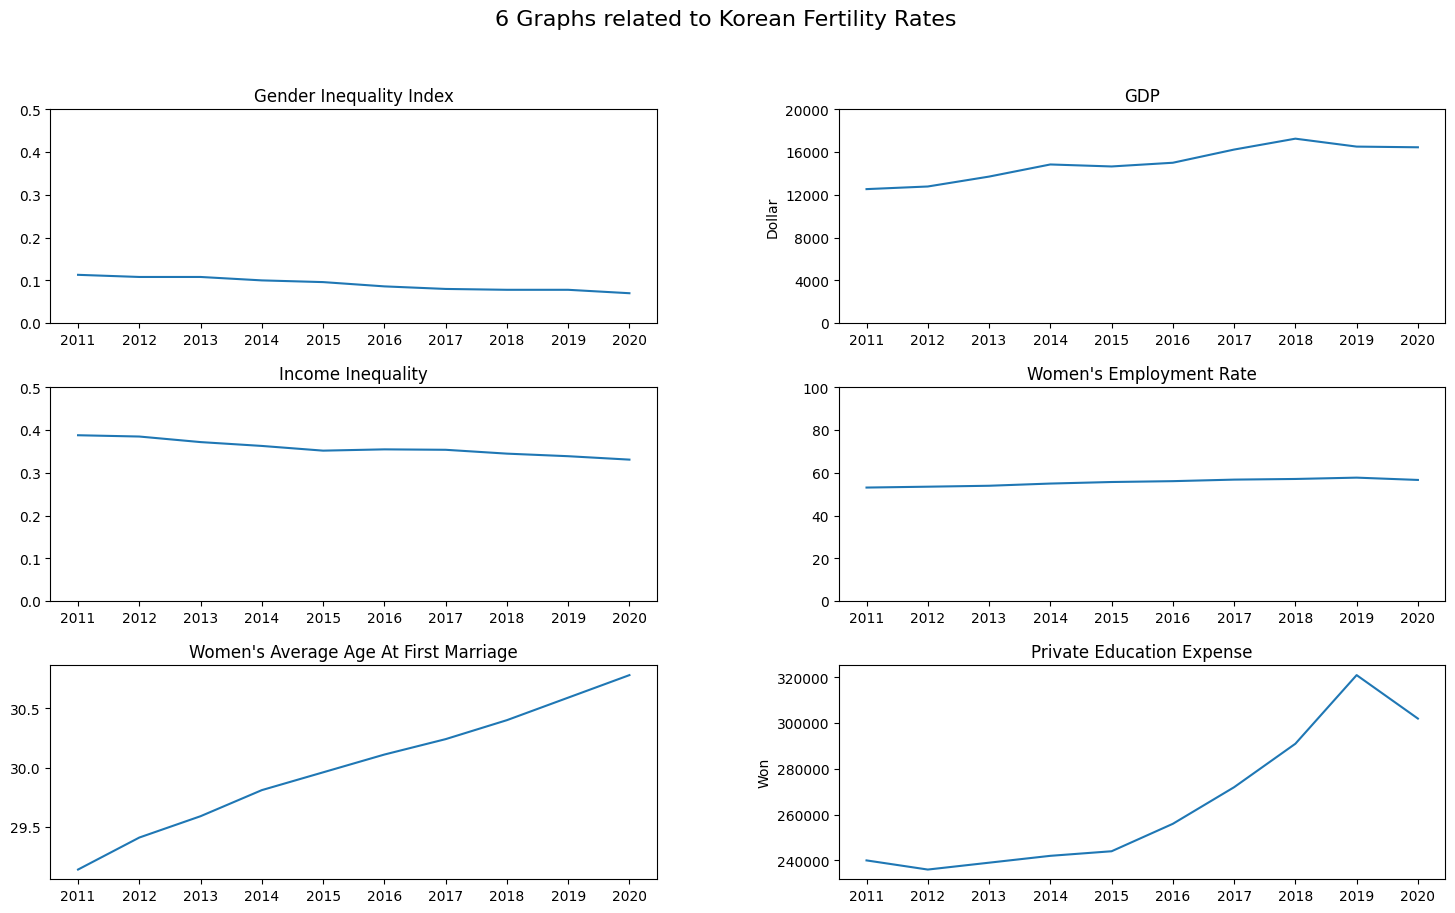

In [25]:
# 데이터프레임 생성
df = pd.DataFrame({
    'x': df_kor_11_20.index,
    'y1': df_kor_11_20['Gender Inequality Index'].to_xarray(),
    'y2': df_kor_11_20['GDP'].to_xarray(),
    'y3': df_kor_11_20['Income Inequality'].to_xarray(),
    'y4': df_kor_11_20['Women Employment Rate'].to_xarray(),
    'y5': df_kor_11_20["Women's Average Age at First Marriage"].to_xarray(),
    'y6': df_kor_11_20['Private Education Expense'].to_xarray()
})

# Figure와 Axes 생성
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))


# 각 Axes에 그래프 그리기
axes[0, 0].plot(df['x'], df['y1'])
axes[0, 0].set_xticks(np.arange(2011, 2021))
axes[0, 0].set_yticks(np.arange(0, .6, 0.1))
axes[0, 0].set_title('Gender Inequality Index')

axes[0, 1].plot(df['x'], df['y2'])
axes[0, 1].set_xticks(np.arange(2011, 2021))
axes[0, 1].set_yticks(np.arange(0, 22000, 4000))
axes[0, 1].set_ylabel('Dollar')
axes[0, 1].set_title('GDP')

axes[1, 0].plot(df['x'], df['y3'])
axes[1, 0].set_xticks(np.arange(2011, 2021))
axes[1, 0].set_yticks(np.arange(0, 0.6, 0.1))
axes[1, 0].set_title('Income Inequality')

axes[1, 1].plot(df['x'], df['y4'])
axes[1, 1].set_xticks(np.arange(2011, 2021))
axes[1, 1].set_yticks(np.arange(0, 110, 20))
axes[1, 1].set_title("Women's Employment Rate")

axes[2, 0].plot(df['x'], df['y5'])
axes[2, 0].set_xticks(np.arange(2011, 2021))
axes[2, 0].set_title("Women's Average Age At First Marriage")

axes[2, 1].plot(df['x'], df['y6'])
axes[2, 1].set_xticks(np.arange(2011, 2021))
axes[2, 1].set_ylabel('Won')
axes[2, 1].set_title('Private Education Expense')

# 전체 그래프 제목 설정
fig.suptitle('6 Graphs related to Korean Fertility Rates', fontsize=16)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# 그래프 출력
plt.show()


### Parental leave

In [80]:
pl_av = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/Parental Leave System - Availability.csv')
pl_aw = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/Parental Leave System-Awareness.csv')

In [81]:
pl_av = pl_av[:4].T[2:].reset_index()
pl_av['index'] = pl_av['index'].str.replace(r'\..*', '')
pl_av = pl_av[(pl_av[0] == '활용가능여부') & (pl_av[2] == '비율 (%)')]
pl_av = pl_av[['index',1,3]].reset_index(drop=True)
pl_av.columns = ['year', 'availability', 'rates']
pl_av.head(6)

/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_6301/2012056164.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  pl_av['index'] = pl_av['index'].str.replace(r'\..*', '')


,year,availability,rates
0,2017,필요한 사람은 모두 자유롭게 활용가능,44.1
1,2017,활용 가능하나 직장분위기 대체인력 확보 어려움 등으로 인해 충분히 사용하지 못함,25.1
2,2017,전혀 활용할 수 없음,30.8
3,2018,필요한 사람은 모두 자유롭게 활용가능,42.7
4,2018,활용 가능하나 직장분위기 대체인력 확보 어려움 등으로 인해 충분히 사용하지 못함,27.0
5,2018,전혀 활용할 수 없음,30.3


In [141]:
result = pl_av.pivot(index='year', columns='availability', values='rates')
result.columns = ['Not available at all', 'Completely available', 'Not sufficiently available']
# result = result.reset_index()
result = result.applymap(lambda x: pd.to_numeric(x, errors='ignore'))
result = result.T
result = result.reindex(['Not available at all', 'Not sufficiently available', 'Completely available'])
result

year,2017,2018,2019,2020,2021
Not available at all,30.8,30.3,28.1,27.8,22.9
Not sufficiently available,25.1,27.0,26.4,24.9,26.4
Completely available,44.1,42.7,45.4,47.3,50.7


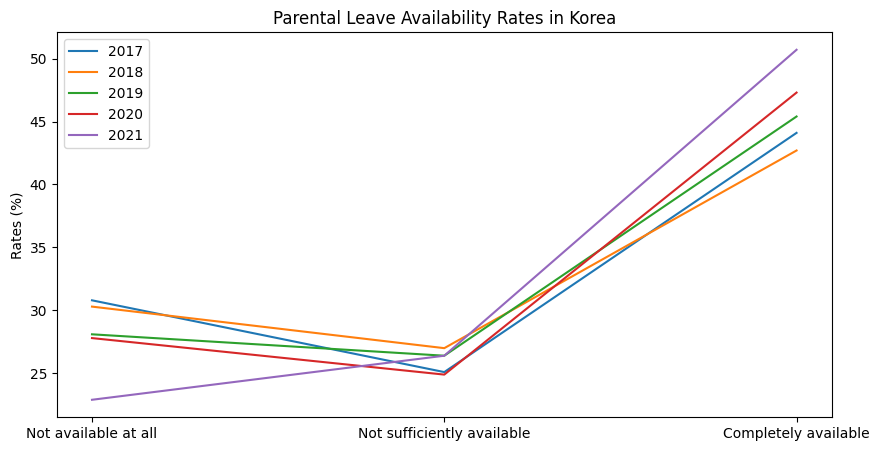

In [152]:
plt.figure(figsize=(10, 5))

plt.plot(result['2017'], label='2017')
plt.plot(result['2018'], label='2018')
plt.plot(result['2019'], label='2019')
plt.plot(result['2020'], label='2020')
plt.plot(result['2021'], label='2021')

plt.xticks(range(len(result)))
plt.legend()

plt.ylabel('Rates (%)')
plt.title('Parental Leave Availability Rates in Korea')

plt.show()


## GERMANY

In [27]:
df_dfr_deu.head()

,TIME,LOCATION,Fertility Rates
0,1970,DEU,2.03
1,1971,DEU,1.97
2,1972,DEU,1.74
3,1973,DEU,1.56
4,1974,DEU,1.53


In [29]:
df_gii_ger = df_gii[df_gii['country']=='Germany'].T
df_gii_ger=df_gii_ger.reset_index()
df_gii_ger.columns = ['TIME', 'Gender Inequality Index']
df_gii_ger = df_gii_ger[df_gii_ger['TIME'].str.startswith('gii')]
df_gii_ger['TIME'] = df_gii_ger['TIME'].str.extract(r'_([\d]+)').astype(int)
df_gii_ger = df_gii_ger.iloc[1:]
df_gii_ger.reset_index(drop=True, inplace=True)

# TIME 컬럼과 Gender Inequality Index컬럼을 숫자형으로 변환
df_gii_ger['TIME'] = pd.to_numeric(df_gii_ger['TIME'])
df_gii_ger['Gender Inequality Index'] = df_gii_ger['Gender Inequality Index'].astype(float)
df_gii_ger.head()

,TIME,Gender Inequality Index
0,1990,0.183
1,1991,0.172
2,1992,0.162
3,1993,0.152
4,1994,0.144


In [35]:
df_gdp_ger = df_gdp[df_gdp['LOCATION']=='DEU']
df_gdp_ger = df_gdp_ger[['TIME', 'Value']]
df_gdp_ger.columns = ['TIME', 'GDP']
df_gdp_ger['TIME'] = pd.to_numeric(df_gdp_ger['TIME'])
df_gdp_ger['GDP'] = df_gdp_ger['GDP'].astype(float)

df_ii_ger = df_ii[df_ii['LOCATION']=='DEU']
df_ii_ger = df_ii_ger[['TIME', 'Value']]
df_ii_ger.columns = ['TIME', 'Income Inequality']
# df_ii_kor['TIME'] = pd.to_numeric(df_ii_kor['TIME'])
# df_ii_kor['Income_Inequality'] = df_ii_kor['Income Inequality'].astype(float)

df_wer_ger = df_wer[df_wer['LOCATION']=='DEU']
df_wer_ger = df_wer_ger[['TIME', 'Value']]
df_wer_ger.columns = ['TIME', 'Women Employment Rate']
df_wer_ger['TIME'] = pd.to_numeric(df_wer_ger['TIME'])
df_wer_ger['Women Employment Rate'] = df_wer_ger['Women Employment Rate'].astype(float)

df_wip_ger = df_wip[df_wip['LOCATION']=='DEU']
df_wip_ger = df_wip_ger[['TIME', 'Value']]
df_wip_ger.columns = ['TIME', 'Women In Politics']
df_wip_ger['TIME'] = pd.to_numeric(df_wip_ger['TIME'])
df_wip_ger['Women In Politics'] = df_wip_ger['Women In Politics'].astype(float)

In [38]:
df_ger = pd.merge(df_gii_ger, df_gdp_ger, on='TIME', how='outer')
df_ger = pd.merge(df_ger, df_ii_ger, on='TIME', how='outer')
df_ger = pd.merge(df_ger, df_wer_ger, on='TIME', how='outer')

df_dfr_deu = df_dfr_deu[['TIME', 'Fertility Rates']]
df_ger = pd.merge(df_ger, df_dfr_deu, on='TIME', how='outer')

# TIME을 기준으로 정렬
df_ger = df_ger.sort_values('TIME')
df_ger.reset_index(inplace=True, drop=True)
df_ger.tail(15)

,TIME,Gender Inequality Index,GDP,Income Inequality,Women Employment Rate,Fertility Rates
38,2008,0.103,38432.448211,0.285,64.30000,1.38
39,2009,0.098,37465.456323,NaN,64.32500,1.36
40,2010,0.096,39675.002380,NaN,65.35000,1.39
41,2011,0.090,42541.513126,0.291,66.92500,1.39
42,2012,0.087,43359.541048,0.289,67.20000,1.41
43,2013,0.078,44993.667838,0.292,68.05000,1.42
44,2014,0.078,47011.280402,0.289,68.57500,1.47
45,2015,0.078,47609.557159,0.293,69.02500,1.50
46,2016,0.085,50579.483717,0.294,69.87500,1.59
47,2017,0.087,53071.478374,0.289,70.57500,1.57


In [39]:
df_ger_11_20 = df_ger.set_index('TIME')
df_ger_11_20 = df_ger_11_20.loc[2011:2020]
df_ger_11_20

,Gender Inequality Index,GDP,Income Inequality,Women Employment Rate,Fertility Rates
TIME,,,,,
2011,0.090,42541.513126,0.291,66.92500,1.39
2012,0.087,43359.541048,0.289,67.20000,1.41
2013,0.078,44993.667838,0.292,68.05000,1.42
2014,0.078,47011.280402,0.289,68.57500,1.47
2015,0.078,47609.557159,0.293,69.02500,1.50
2016,0.085,50579.483717,0.294,69.87500,1.59
2017,0.087,53071.478374,0.289,70.57500,1.57
2018,0.083,55195.722049,0.289,71.15000,1.57
2019,0.079,57397.473982,0.296,71.85000,1.54


In [40]:
df_ger_11_20.corr()

,Gender Inequality Index,GDP,Income Inequality,Women Employment Rate,Fertility Rates
Gender Inequality Index,1.000000,-0.351793,-0.352624,-0.433498,-0.149146
GDP,-0.351793,1.000000,0.313299,0.974396,0.837918
Income Inequality,-0.352624,0.313299,1.000000,0.339316,0.228498
Women Employment Rate,-0.433498,0.974396,0.339316,1.000000,0.788083
Fertility Rates,-0.149146,0.837918,0.228498,0.788083,1.000000


## ITALY

In [42]:
df_dfr_ita.tail()

,TIME,LOCATION,Fertility Rates
97,2016,ITA,1.36
98,2017,ITA,1.34
99,2018,ITA,1.31
100,2019,ITA,1.27
101,2020,ITA,1.24


In [43]:
df_gii_ita = df_gii[df_gii['country']=='Italy'].T
df_gii_ita=df_gii_ita.reset_index()
df_gii_ita.columns = ['TIME', 'Gender Inequality Index']
df_gii_ita = df_gii_ita[df_gii_ita['TIME'].str.startswith('gii')]
df_gii_ita['TIME'] = df_gii_ita['TIME'].str.extract(r'_([\d]+)').astype(int)
df_gii_ita = df_gii_ita.iloc[1:]
df_gii_ita.reset_index(drop=True, inplace=True)

# TIME 컬럼과 Gender Inequality Index컬럼을 숫자형으로 변환
df_gii_ita['TIME'] = pd.to_numeric(df_gii_ita['TIME'])
df_gii_ita['Gender Inequality Index'] = df_gii_ita['Gender Inequality Index'].astype(float)
df_gii_ita.head()

,TIME,Gender Inequality Index
0,1990,0.212
1,1991,0.206
2,1992,0.205
3,1993,0.206
4,1994,0.201


In [44]:
df_gdp_ita = df_gdp[df_gdp['LOCATION']=='ITA']
df_gdp_ita = df_gdp_ita[['TIME', 'Value']]
df_gdp_ita.columns = ['TIME', 'GDP']
df_gdp_ita['TIME'] = pd.to_numeric(df_gdp_ita['TIME'])
df_gdp_ita['GDP'] = df_gdp_ita['GDP'].astype(float)

df_ii_ita = df_ii[df_ii['LOCATION']=='ITA']
df_ii_ita = df_ii_ita[['TIME', 'Value']]
df_ii_ita.columns = ['TIME', 'Income Inequality']
# df_ii_kor['TIME'] = pd.to_numeric(df_ii_kor['TIME'])
# df_ii_kor['Income_Inequality'] = df_ii_kor['Income Inequality'].astype(float)

df_wer_ita = df_wer[df_wer['LOCATION']=='ITA']
df_wer_ita = df_wer_ita[['TIME', 'Value']]
df_wer_ita.columns = ['TIME', 'Women Employment Rate']
df_wer_ita['TIME'] = pd.to_numeric(df_wer_ita['TIME'])
df_wer_ita['Women Employment Rate'] = df_wer_ita['Women Employment Rate'].astype(float)

df_wip_ita = df_wip[df_wip['LOCATION']=='ITA']
df_wip_ita = df_wip_ita[['TIME', 'Value']]
df_wip_ita.columns = ['TIME', 'Women In Politics']
df_wip_ita['TIME'] = pd.to_numeric(df_wip_ita['TIME'])
df_wip_ita['Women In Politics'] = df_wip_ita['Women In Politics'].astype(float)

In [45]:
df_ita = pd.merge(df_gii_ita, df_gdp_ita, on='TIME', how='outer')
df_ita = pd.merge(df_ita, df_ii_ita, on='TIME', how='outer')
df_ita = pd.merge(df_ita, df_wer_ita, on='TIME', how='outer')

df_dfr_ita = df_dfr_ita[['TIME', 'Fertility Rates']]
df_ita = pd.merge(df_ita, df_dfr_ita, on='TIME', how='outer')

# TIME을 기준으로 정렬
df_ita = df_ita.sort_values('TIME')
df_ita.reset_index(inplace=True, drop=True)
df_ita.tail(15)

,TIME,Gender Inequality Index,GDP,Income Inequality,Women Employment Rate,Fertility Rates
38,2008,0.127,35292.601856,0.317,47.250,1.44
39,2009,0.125,34335.925384,0.315,46.150,1.44
40,2010,0.123,34838.135774,0.327,45.875,1.44
41,2011,0.119,36203.328522,0.327,46.250,1.42
42,2012,0.115,36091.373957,0.330,46.775,1.42
43,2013,0.086,36267.925352,0.325,46.250,1.39
44,2014,0.082,36475.976061,0.326,46.650,1.38
45,2015,0.079,37206.331822,0.333,47.025,1.36
46,2016,0.075,40267.222623,0.327,48.050,1.36
47,2017,0.070,41951.466331,0.334,48.900,1.34


In [46]:
df_ita_11_20 = df_ita.set_index('TIME')
df_ita_11_20 = df_ita_11_20.loc[2011:2020]
df_ita_11_20

,Gender Inequality Index,GDP,Income Inequality,Women Employment Rate,Fertility Rates
TIME,,,,,
2011,0.119,36203.328522,0.327,46.250,1.42
2012,0.115,36091.373957,0.330,46.775,1.42
2013,0.086,36267.925352,0.325,46.250,1.39
2014,0.082,36475.976061,0.326,46.650,1.38
2015,0.079,37206.331822,0.333,47.025,1.36
2016,0.075,40267.222623,0.327,48.050,1.36
2017,0.070,41951.466331,0.334,48.900,1.34
2018,0.057,43427.663143,0.330,49.525,1.31
2019,0.054,45799.741922,NaN,50.175,1.27


In [47]:
df_ita_11_20.corr()

,Gender Inequality Index,GDP,Income Inequality,Women Employment Rate,Fertility Rates
Gender Inequality Index,1.000000,-0.846150,-0.283450,-0.808499,0.905150
GDP,-0.846150,1.000000,0.449780,0.975099,-0.895987
Income Inequality,-0.283450,0.449780,1.000000,0.532819,-0.444043
Women Employment Rate,-0.808499,0.975099,0.532819,1.000000,-0.807897
Fertility Rates,0.905150,-0.895987,-0.444043,-0.807897,1.000000
